# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [68]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [69]:
# YOUR CODE HERE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [70]:
# load data into DataFrame 
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [71]:
# Drop columns that are missing majority of data
unstr_text_colnames = ['GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year']
df.drop(columns=unstr_text_colnames, inplace=True)

In [72]:
# see what data is still missing 
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                0
year                                                   0
Life Ladder                                            0
Log GDP per capita                                    27
Social support                                        13
Healthy life expectancy at birth                       9
Freedom to make life choices                          29
Generosity                                            80
Perceptions of corruption                             90
Positive affect                                       18
Negative affect                                       12
Confidence in national government                    161
Democratic Quality                                   171
Delivery Quality                                     171
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI index (World Bank estimate), average 2000-15    176
dtype: int64

In [73]:
# visualize data better
df.loc[df['Log GDP per capita'].isnull()]['country']

#df.loc[df['country']=="Central African Republic"]
#df.loc[df['country']=="North Cyprus"]


#missing countries
# Log GDP per capita: North Cyprus, Somalia, Somalialand region 
# Social support: Oman
# Healthy life expectancy at birth: North Cyprus, Somalialand region
# Generosity: Cuba, North Cyrpus, Somalia, Somalilaland Region
# Perceptions of corruption: China, Cuba, Oman, Turkmenistan
# Positive affect: Oman 
# Confidence in national government: 
# Democratic Quality: Kosovo, North Cyprus, Palestinian Territories, Somalialand region
# Delivery Quality: Kosovo, North Cyprus, Palestinian Territories, Somalialand region
# GINI index (World Bank estimate), average 2000-15: 

252     Central African Republic
737                       Kosovo
801                        Libya
1031                North Cyprus
1032                North Cyprus
1033                North Cyprus
1034                North Cyprus
1035                North Cyprus
1067     Palestinian Territories
1247                     Somalia
1248                     Somalia
1249                     Somalia
1250           Somaliland region
1251           Somaliland region
1252           Somaliland region
1253           Somaliland region
1281                 South Sudan
1336                       Syria
1337                       Syria
1341    Taiwan Province of China
1342    Taiwan Province of China
1343    Taiwan Province of China
1344    Taiwan Province of China
1345    Taiwan Province of China
1346    Taiwan Province of China
1347    Taiwan Province of China
1538                       Yemen
Name: country, dtype: object

In [74]:
#print(df.loc[df['country']=="Syria"]['Log GDP per capita'])
#print(df.loc[df['country']=="Syria"]['Log GDP per capita'].mean())
#print()

# visualize data better 
feature = 'country'
country = 'Syria'
missing_feature = 'Log GDP per capita'
print(df[df[feature]==country][missing_feature])
mean = df[df[feature]==country][missing_feature].mean()
print(mean)
print()

countries = set()
for country in df['country']:
    countries.add(country)
#print(countries)

#df['age'].fillna(value=mean_ages, inplace=True)

1331    8.536139
1332    8.561270
1333    8.569223
1334    8.589342
1335    8.609065
1336         NaN
1337         NaN
Name: Log GDP per capita, dtype: float64
8.5730077744



In [75]:
# replace missing values with mean from each country 

mean_gdp=df['Log GDP per capita'].mean()
df['Log GDP per capita'].fillna(value=mean_gdp, inplace=True)

mean_ss=df['Social support'].mean()
df['Social support'].fillna(value=mean_ss, inplace=True)

mean_hlf=df['Healthy life expectancy at birth'].mean()
df['Healthy life expectancy at birth'].fillna(value=mean_hlf, inplace=True)

mean_gen=df['Generosity'].mean()
df['Generosity'].fillna(value=mean_gen, inplace=True)

mean_percep=df['Perceptions of corruption'].mean()
df['Perceptions of corruption'].fillna(value=mean_percep, inplace=True)

mean_pos=df['Positive affect'].mean()
df['Positive affect'].fillna(value=mean_pos, inplace=True)

mean_conf=df['Confidence in national government'].mean()
df['Confidence in national government'].fillna(value=mean_conf, inplace=True)

mean_dem=df['Democratic Quality'].mean()
df['Democratic Quality'].fillna(value=mean_dem, inplace=True)

mean_del=df['Delivery Quality'].mean()
df['Delivery Quality'].fillna(value=mean_del, inplace=True)

#maybe drop? 
mean_gini=df['GINI index (World Bank estimate), average 2000-15'].mean()
df['GINI index (World Bank estimate), average 2000-15'].fillna(value=mean_gini, inplace=True)

In [76]:
# replace remaining missing values with mean
grouped = df.groupby('country')
df_filled = grouped.transform(lambda x: x.fillna(x.mean()))

# Keep the original country column intact
#df_filled['country'] = df['country']
# Put country back as first column
#column_order = ['country'] + [col for col in df_filled.columns if col != 'country']
#df_filled = df_filled[column_order]

nan_count = np.sum(df_filled.isnull(), axis = 0)
nan_count

df_filled.head()
#df.head()
nan_count = np.sum(df_filled.isnull(), axis = 0)
nan_count


year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
GINI index (World Bank estimate), average 2000-15    0
dtype: int64

In [77]:
#df_filled.loc[df_filled['Delivery Quality'].isnull()]['country']
df_filled.loc[df_filled['Delivery Quality'].isnull()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [78]:
df = df_filled

# Life Ladder is label 
# used to measure happiness
y = df['Life Ladder'] 
X = df.drop(columns = 'Life Ladder', axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

X_train.head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"
1326,2012,10.935776,0.946864,72.734001,0.945428,0.125727,0.323241,0.859107,0.176007,0.769940,1.529229,1.879037,1.564781,0.201227,0.327571
1069,2007,9.542232,0.937078,66.400909,0.640219,0.091073,0.915287,0.819987,0.149341,0.250142,0.280292,0.015082,2.270610,0.329354,0.536750
520,2017,10.117517,0.752900,71.780342,0.438300,-0.296735,0.872239,0.602939,0.332831,0.139881,-0.126617,0.004947,2.411631,0.468438,0.346909
643,2017,11.066487,0.943482,71.709785,0.905341,0.206802,0.337085,0.833389,0.212784,0.603800,-0.126617,0.004947,1.761334,0.249475,0.325545
446,2008,10.659014,0.951340,69.745049,0.934179,0.015997,0.216568,0.772778,0.143539,0.723243,1.454463,1.980400,1.420638,0.185205,0.275909


In [80]:
print('Begin Random Forest Implementation...')

# 1. Create the RandomForestRegressor model object below and assign to variable 'rf_20_model'
rf_20_model = RandomForestRegressor(criterion='mse', n_estimators=20)

# 2. Fit the model to the training data below
rf_20_model.fit(X_train, y_train)

# 3. Make predictions on the test data and assign the result to a list named 'rf_20_predictions' below
rf_20_predictions = rf_20_model.predict(X_test)

# 4. Create the RandomForestRegressor model object below and assign to variable 'rf_100_model'
rf_100_model = RandomForestRegressor(criterion='mse', n_estimators=100)

# 5. Fit the model to the training data below
rf_100_model.fit(X_train, y_train)

# 6. Make predictions on the test data and assign the result to a list named 'rf_100_predictions' below
rf_100_predictions = rf_100_model.predict(X_test)

print('End')

Begin Random Forest Implementation...
End


In [81]:
# Calculate predictions for rf_20_model and rf_100_model
rf_20_predictions = rf_20_model.predict(X_test)
rf_100_predictions = rf_100_model.predict(X_test)

# Calculate evaluation metrics
mae_rf_20 = mean_absolute_error(y_test, rf_20_predictions)
mae_rf_100 = mean_absolute_error(y_test, rf_100_predictions)

mse_rf_20 = mean_squared_error(y_test, rf_20_predictions)
mse_rf_100 = mean_squared_error(y_test, rf_100_predictions)

rmse_rf_20 = mse_rf_20 ** 0.5
rmse_rf_100 = mse_rf_100 ** 0.5

r2_rf_20 = r2_score(y_test, rf_20_predictions)
r2_rf_100 = r2_score(y_test, rf_100_predictions)

print('Mean Absolute Error (RF 20):', mae_rf_20)
print('Mean Absolute Error (RF 100):', mae_rf_100)
print()
print('Mean Squared Error (RF 20):', mse_rf_20)
print('Mean Squared Error (RF 100):', mse_rf_100)
print()
print('Root Mean Squared Error (RF 20):', rmse_rf_20)
print('Root Mean Squared Error (RF 100):', rmse_rf_100)
print()
print('R-squared (RF 20):', r2_rf_20)
print('R-squared (RF 100):', r2_rf_100)

Mean Absolute Error (RF 20): 0.15570839150252103
Mean Absolute Error (RF 100): 0.15002399633802965

Mean Squared Error (RF 20): 0.04576874188308519
Mean Squared Error (RF 100): 0.042436056413926254

Root Mean Squared Error (RF 20): 0.2139363033313542
Root Mean Squared Error (RF 100): 0.20600013692695995

R-squared (RF 20): 0.9640713369676313
R-squared (RF 100): 0.9666875096717041


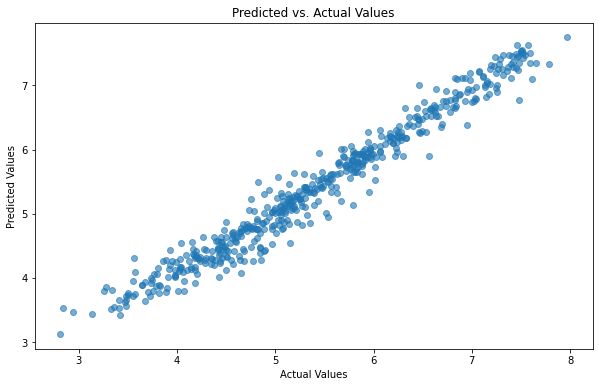

In [82]:
# Scatter Plot - Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_20_predictions, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

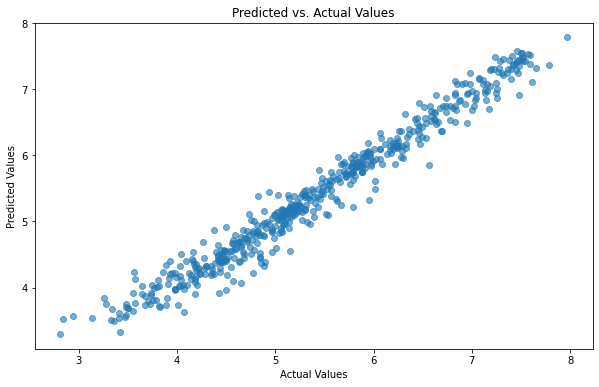

In [83]:
# Scatter Plot - Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_100_predictions, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [84]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_20_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [85]:
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
# Set the best parameters for the best_model
best_model.set_params(**best_params)

# Train the final model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("New Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

New Model Performance:
Mean Squared Error: 0.041929156805857716
R-squared: 0.9670854280863299


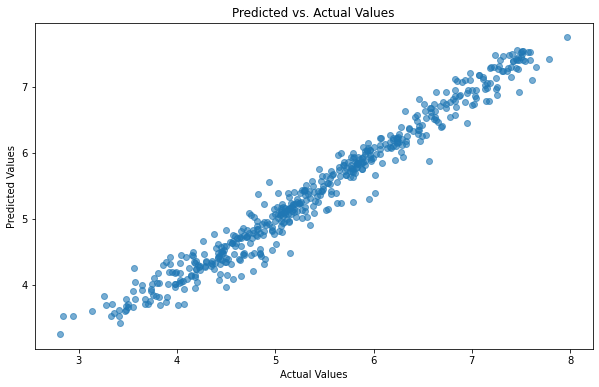

In [88]:
# Scatter Plot - Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [89]:
# Comments on process 

# From my original plan, I changed the label and the model type. 
# I changed the label from healthy life expectancy to life ladder because life ladder was 
# not originally missing any data, so I thought it would be easier to show how correct the 
# model was. 

# I also changed the model type a few times. My orignal plan was to do a decision tree. Then, 
# I tried a gradient boosted decision tree before finally deciding on a random forest. 
# After preparing the data, mainly through techniques such as removing columns that were 
# missing too much data and replacing missing values, I trained and fit the model. I made 2 
# random forest models, one with 20 estimators and one with 100. After analyzing the results, 
# I found that the model with 100 estimators performed better, with a mean squared error of 
# .04568 compared to .04244 and an r squared of .964 compared to .967. I plotted these 
# results to better visualize the model's performance and compare the two results.

# I wanted to see how this model could be improved, so I used gridsearchcv with different 
# values to find the best parameters and model. I used the same technique to visualize the results
# on a plot. The resulting model had a mean squared error of .0419 and an r squared of .967, 
# which was slightly better than the original random forest with 100 estimators. Therefore, 
# I would use this as my final model. 